In [1]:
import json
import pandas as pd
from collections import Counter
from Graph_Helpers import *
import seaborn as sns
import itertools

from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

from adjustText import adjust_text
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from collections import Counter

In [2]:
import sys
sys.version

'3.12.3 (v3.12.3:f6650f9ad7, Apr  9 2024, 08:18:47) [Clang 13.0.0 (clang-1300.0.29.30)]'

### Visualise Indian Spice-indication mapping

In [35]:
region2spice_final = pd.read_csv("../Data/region2spice_final.csv", index_col=0)
spice2ind_final = pd.read_csv("../Data/spice2ind_final.csv", index_col=0)



In [31]:
region2spice_final.head()

,ajowan,allspice,almond,angelica,anise,apple,apricot,arrowroot,asafetida,asparagus,...,strawberry,sweet marjoram,sweet potato,tamarind,thyme,tomato,turmeric,vanilla,watermelon,white mustard
cuisine,,,,,,,,,,,,,,,,,,,,,
Andhra,0.019231,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.230769,0.0,...,0.000000,0.000000,0.000000,0.307692,0.000000,0.153846,0.384615,0.000000,0.000000,0.000000
Bengali,0.007168,0.0,0.082437,0.0,0.021505,0.017921,0.003584,0.007168,0.121864,0.0,...,0.000000,0.000000,0.017921,0.039427,0.000000,0.197133,0.491039,0.014337,0.000000,0.003584
Goan,0.025641,0.0,0.012821,0.0,0.000000,0.000000,0.000000,0.000000,0.038462,0.0,...,0.000000,0.000000,0.012821,0.269231,0.000000,0.269231,0.602564,0.012821,0.000000,0.000000
Gujarati,0.057043,0.0,0.062864,0.0,0.000000,0.012806,0.000000,0.010477,0.426077,0.0,...,0.001164,0.001164,0.012806,0.036088,0.001164,0.087311,0.470314,0.002328,0.000000,0.000000
Hyderabadi,0.017647,0.0,0.123529,0.0,0.000000,0.023529,0.011765,0.005882,0.052941,0.0,...,0.000000,0.000000,0.000000,0.129412,0.000000,0.276471,0.541176,0.005882,0.005882,0.005882


In [27]:
spice2ind_final.head()

,Paratyphus,Pediculosis,Tinea,Bunion,Jaundice,Filariasis,Thyrosis,Leukorrhea,"Cancer,penis",Trypanosomiasis,...,Bruise,Kawasaki disease,Sprain,BPH,Dyspepsia,Neuralgia,Eruption,Vertigo,Neurasthenia,Snake bite
spice,,,,,,,,,,,,,,,,,,,,,
ajowan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
allspice,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
almond,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
angelica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
anise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
region2ind = region2spice_final.dot(spice2ind_final)
region2ind

,Paratyphus,Pediculosis,Tinea,Bunion,Jaundice,Filariasis,Thyrosis,Leukorrhea,"Cancer,penis",Trypanosomiasis,...,Bruise,Kawasaki disease,Sprain,BPH,Dyspepsia,Neuralgia,Eruption,Vertigo,Neurasthenia,Snake bite
cuisine,,,,,,,,,,,,,,,,,,,,,
Andhra,0.480769,0.019231,0.423077,0.250000,1.865385,0.480769,0.846154,0.846154,0.019231,0.480769,...,1.673077,0.442308,1.500000,0.153846,5.865385,4.326923,0.538462,2.865385,0.846154,4.942308
Bengali,0.261649,0.132616,0.225806,0.232975,1.494624,0.261649,0.659498,0.698925,0.035842,0.261649,...,1.559140,0.336918,1.587814,0.215054,5.003584,3.186380,0.383513,1.946237,0.734767,3.498208
Goan,0.666667,0.051282,0.794872,0.551282,2.371795,0.666667,0.846154,1.166667,0.064103,0.666667,...,2.538462,0.589744,1.833333,0.269231,7.410256,5.153846,0.153846,3.653846,0.871795,5.025641
Gujarati,0.175786,0.038417,0.180442,0.172293,1.467986,0.175786,0.838184,0.521537,0.038417,0.175786,...,1.318976,0.410943,1.499418,0.103609,4.726426,3.242142,0.308498,2.064028,1.103609,4.066356
Hyderabadi,0.688235,0.211765,0.729412,0.676471,1.752941,0.688235,0.794118,1.429412,0.064706,0.688235,...,2.382353,0.764706,2.082353,0.305882,9.052941,5.905882,0.229412,3.776471,1.382353,5.841176
Jain,0.085714,0.117460,0.311111,0.193651,1.450794,0.085714,0.777778,0.526984,0.053968,0.085714,...,1.079365,0.241270,1.539683,0.307937,4.841270,2.803175,0.317460,1.726984,0.844444,3.904762
Karnataka,0.272000,0.024000,0.432000,0.160000,2.272000,0.272000,0.800000,0.832000,0.032000,0.272000,...,1.696000,0.304000,1.352000,0.216000,5.328000,3.616000,0.448000,2.584000,0.904000,4.304000
Kashmiri,0.234043,0.191489,0.510638,0.595745,1.765957,0.234043,0.638298,1.191489,0.000000,0.234043,...,1.808511,0.765957,1.446809,0.063830,7.021277,3.957447,0.106383,2.574468,1.595745,4.851064
Kerala,0.440945,0.055118,0.433071,0.149606,2.307087,0.440945,0.787402,0.574803,0.102362,0.440945,...,2.118110,0.511811,1.385827,0.196850,5.448819,3.795276,0.433071,2.590551,0.834646,4.204724


In [49]:
region2indcat = pd.read_csv("../Data/region2spice_final.csv", index_col=0)
region2indcat

,ajowan,allspice,almond,angelica,anise,apple,apricot,arrowroot,asafetida,asparagus,...,strawberry,sweet marjoram,sweet potato,tamarind,thyme,tomato,turmeric,vanilla,watermelon,white mustard
cuisine,,,,,,,,,,,,,,,,,,,,,
Andhra,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,...,0.000000,0.000000,0.000000,0.307692,0.000000,0.153846,0.384615,0.000000,0.000000,0.000000
Bengali,0.007168,0.000000,0.082437,0.000000,0.021505,0.017921,0.003584,0.007168,0.121864,0.000000,...,0.000000,0.000000,0.017921,0.039427,0.000000,0.197133,0.491039,0.014337,0.000000,0.003584
Goan,0.025641,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,...,0.000000,0.000000,0.012821,0.269231,0.000000,0.269231,0.602564,0.012821,0.000000,0.000000
Gujarati,0.057043,0.000000,0.062864,0.000000,0.000000,0.012806,0.000000,0.010477,0.426077,0.000000,...,0.001164,0.001164,0.012806,0.036088,0.001164,0.087311,0.470314,0.002328,0.000000,0.000000
Hyderabadi,0.017647,0.000000,0.123529,0.000000,0.000000,0.023529,0.011765,0.005882,0.052941,0.000000,...,0.000000,0.000000,0.000000,0.129412,0.000000,0.276471,0.541176,0.005882,0.005882,0.005882
Jain,0.031746,0.000000,0.038095,0.000000,0.003175,0.034921,0.000000,0.000000,0.377778,0.006349,...,0.003175,0.003175,0.000000,0.076190,0.003175,0.266667,0.393651,0.003175,0.003175,0.000000
Karnataka,0.008000,0.000000,0.024000,0.000000,0.000000,0.024000,0.000000,0.000000,0.328000,0.000000,...,0.008000,0.000000,0.000000,0.328000,0.000000,0.192000,0.384000,0.008000,0.000000,0.000000
Kashmiri,0.000000,0.000000,0.191489,0.000000,0.148936,0.021277,0.021277,0.000000,0.361702,0.000000,...,0.000000,0.000000,0.000000,0.063830,0.021277,0.042553,0.361702,0.000000,0.000000,0.000000
Kerala,0.015748,0.000000,0.015748,0.000000,0.007874,0.015748,0.000000,0.000000,0.173228,0.000000,...,0.000000,0.000000,0.007874,0.181102,0.000000,0.181102,0.464567,0.007874,0.000000,0.000000


In [ ]:
with open("../Data/count_dict_indication.json", "r") as f:
    count_dict_indication = json.load(f)

print(count_dict_indication, len(count_dict_indication))


{'infectious_disease': 119, 'gastrointestinal_disease': 78, 'neuronal_disease': 36, 'musculoskeletal_disease ': 21, 'cancer_disease': 81, 'reproductive_disease': 30, 'respiratory_disease': 35, 'immune_disease': 11, 'nutritional_disease': 6, 'mental_disease': 36, 'skin_disease': 46, 'injury': 12, 'cardiovascular_disease': 26, 'blood_disease': 13, 'pregnancy_disease': 9, 'General symptom': 87, 'nephrological_disease': 29, 'general_disease': 5, 'metabolic_disease': 7, 'othercauses': 3, 'ear_disease': 5, 'poisoning': 7, 'eye_disease': 16, 'sleep_disease': 2, 'endocrine_disease': 8, 'oral_disease': 2, 'smell_taste_disease': 3} 27


In [57]:
with open("indication_group_Indian_dict.json", "r") as f:
    indication_group_Indian_dict = json.load(f)

print(len(indication_group_Indian_dict))


733


In [58]:
region2indcat = pd.DataFrame(columns=count_dict_indication.keys() )

temp = {}
for k, v in indication_group_Indian_dict.items():
    temp[k]= [v]
    
temp = reverse_dict(temp) # get category to indication dictionary

for k,v in temp.items():
    region2indcat[k] = region2ind[v].sum(axis=1)#/(len(v))
    
region2indcat   



,infectious_disease,gastrointestinal_disease,neuronal_disease,musculoskeletal_disease,cancer_disease,reproductive_disease,respiratory_disease,immune_disease,nutritional_disease,mental_disease,...,general_disease,metabolic_disease,othercauses,ear_disease,poisoning,eye_disease,sleep_disease,endocrine_disease,oral_disease,smell_taste_disease
cuisine,,,,,,,,,,,,,,,,,,,,,
Andhra,151.173077,97.038462,38.653846,32.865385,71.423077,22.826923,61.250000,7.480769,3.269231,24.884615,...,2.384615,7.019231,3.500000,8.846154,7.192308,12.076923,2.346154,9.153846,0.000000,1.076923
Bengali,119.103943,82.096774,29.827957,26.978495,64.752688,20.379928,50.043011,6.541219,2.802867,22.663082,...,2.301075,5.853047,2.627240,6.551971,5.064516,10.971326,1.817204,7.172043,0.021505,0.917563
Goan,198.000000,123.769231,46.820513,39.717949,94.794872,31.641026,77.205128,10.512821,3.346154,32.756410,...,3.358974,9.243590,4.102564,10.179487,7.794872,15.871795,2.884615,10.910256,0.012821,1.487179
Gujarati,112.804424,79.485448,30.961583,27.955763,58.824214,19.158324,49.172293,6.311991,2.916182,21.823050,...,2.038417,5.668219,2.697322,5.696158,5.634459,10.848661,1.982538,7.097788,0.023283,0.775320
Hyderabadi,212.629412,144.658824,51.858824,45.582353,111.976471,36.700000,86.452941,11.958824,3.700000,41.929412,...,3.782353,9.488235,4.170588,11.147059,8.535294,17.458824,3.700000,10.870588,0.011765,1.311765
Jain,104.952381,77.114286,28.657143,25.901587,58.368254,18.361905,46.679365,4.784127,2.780952,20.549206,...,2.031746,5.009524,2.469841,5.209524,5.266667,10.587302,1.666667,6.650794,0.050794,0.511111
Karnataka,135.000000,88.880000,33.832000,28.976000,66.792000,22.144000,55.968000,5.944000,3.208000,21.984000,...,2.368000,7.200000,3.080000,7.360000,6.192000,11.208000,2.088000,8.424000,0.000000,1.128000
Kashmiri,150.170213,115.978723,40.489362,34.404255,86.404255,30.680851,69.765957,9.021277,3.361702,32.765957,...,3.574468,6.106383,2.765957,7.936170,6.106383,14.212766,2.744681,7.957447,0.000000,0.787234
Kerala,145.724409,92.141732,34.937008,30.354331,69.110236,23.377953,59.039370,7.440945,3.456693,23.566929,...,2.598425,7.401575,3.220472,8.086614,6.055118,11.141732,2.259843,8.976378,0.007874,1.047244


In [59]:
region2indcat.sum().min()

0.2131440790118617

In [62]:
region2indcat.columns

rename_dict= {}
for col in region2indcat.columns:
    rename_dict[col] = col.replace("_disease", "").capitalize()
    
region2indcat.rename(rename_dict, axis='columns', inplace=True )
region2indcat.rename({'Smell_taste' : 'Smell & Taste', 'Othercauses': 'Other causes'}, axis='columns', inplace=True )

region2indcat.drop(columns=['General', 'Injury', 'Other causes'], inplace=True)

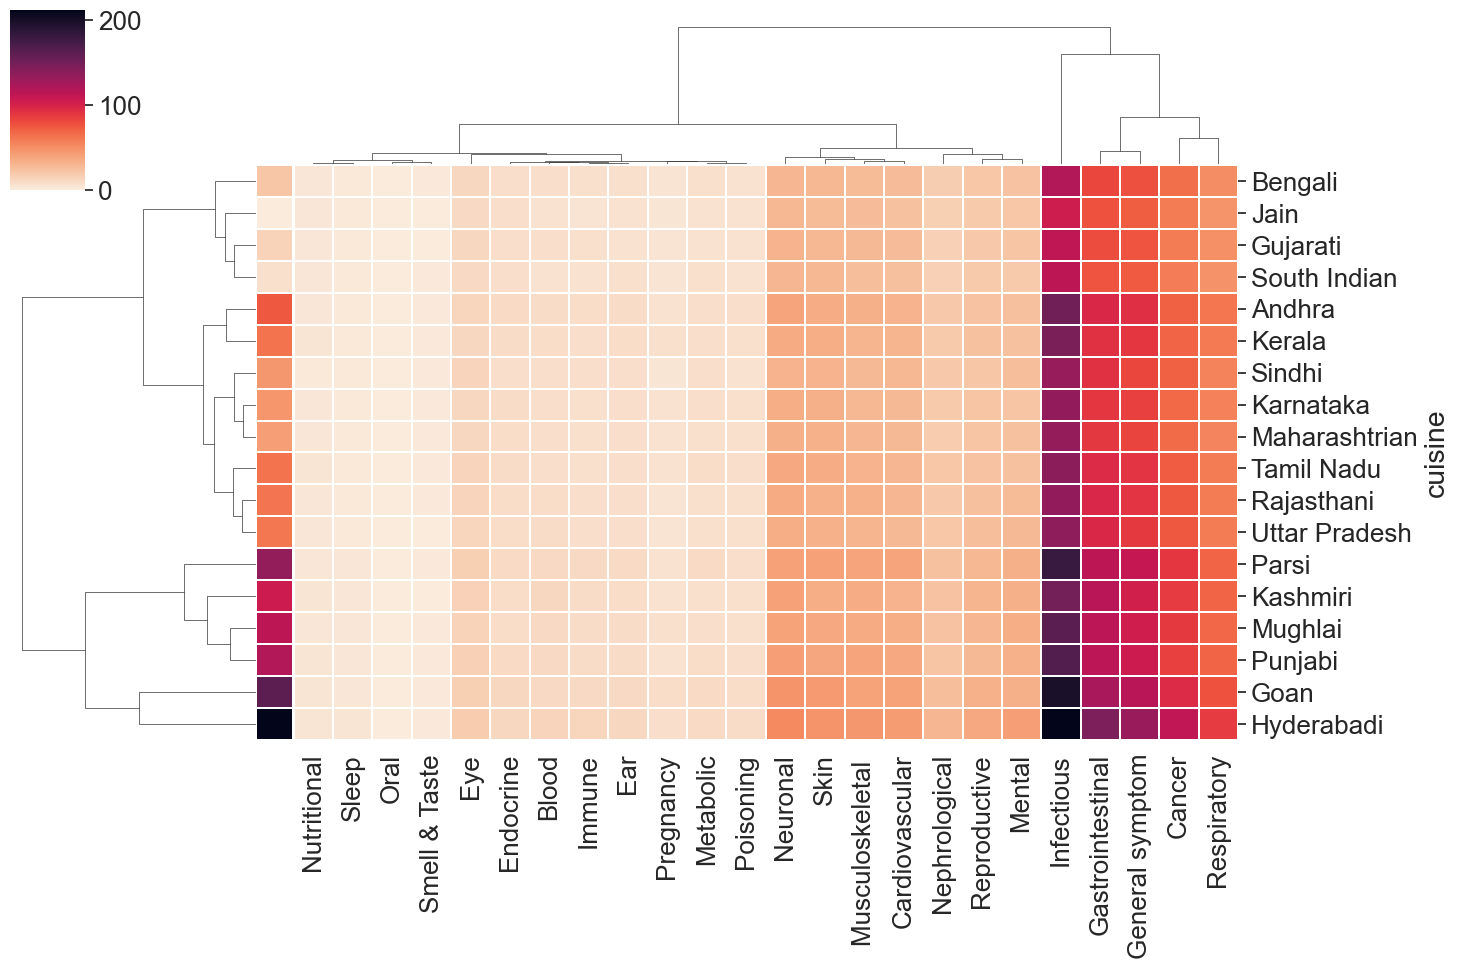

In [64]:


def mapcolor(region2indcat):
    temp = region2indcat.sum()
    temp= (temp-temp.min())/(temp.max()-temp.min())
    col_colors = sns.cm.rocket_r(temp, len(temp)) #rocket_r  # mako
    return col_colors

#plt.figure(figsize=(5,5))
sns.set(font_scale=1.7)

sns.clustermap(region2indcat, cmap= sns.cm.rocket_r,  row_colors = mapcolor(region2indcat.T), figsize= (15,10), linewidth=0.1) #rocket_r, ,, linewidths=0.1 

plt.savefig("../Figures/Indiancuisine_diseases.png", format='png')

plt.show()